# 5월 10일
##  (개인정리)
## 회귀분석 복습
#### 경사하강법
- 미분이란 : 어떤 면의 기울기를 구하는것
- 딥러닝에서는 방정식에 여러 산이 나타나는데 잘못하면 한 구덩이에 빠져서 나올수 없게 됨
- 여러개의 로컬 미니멈과 한개의 글로벌미니멈이 있음.
  - 로컬 미니멈 : 방정식에 나타나는 여러 골짜기 중 일부
  - 글로벌 미니멈 : 가장 낮은 골짜기
- 미분을 하다보면 로컬 미니멈에 빠져서 못 나오는 경우가 있음
- 해결하는 방법 -> 초기값을 다시 설정 해주기
- 그래디언트값을 써야 하는 이유(1차 미분을 해야 하는 이유)
  - 초기값을 다시 설정하는 대신 2차 미분을 하면 함수를 따라갈 수 있으나 계산식의 양이 폭발하듯 늘어나기 때문에 컴퓨터가 계산양을 따라갈 수 없음
  - 그래서 1차 미분을 해야함.
- 그래디언트값으로 방향만 정해준 뒤 1차미분으로 계산
- 단점 
  - 2차미분을 해야하는데 1차 미분만 했으므로 에러가 좀 크다.


모델링은 보통 중요하지 않고 전처리가 굉장히 중요함.
통계학을 통해 그래디언트값을 정하는 등의 전처리를 잘 해줘야 컴퓨터가 제대로 처리 해 줌.



### 복습
## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.0.2

In [2]:
import sklearn
print(sklearn.__version__)

1.0.2


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

#boston 데이터셋 DataFrame변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

#boston dataset의 target array는 주택 가격
#이를 컬럼 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기:', bostonDF.shape)
bostonDF

Boston 데이터셋 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


- CRIM : 지역별 점외 발생률
- ZN : 25,000 평방피트를 초과하는 거주 지역의 비율
- NDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위차한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000 달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
-  MEDV : 본인 소유의 주택가격(중앙값)

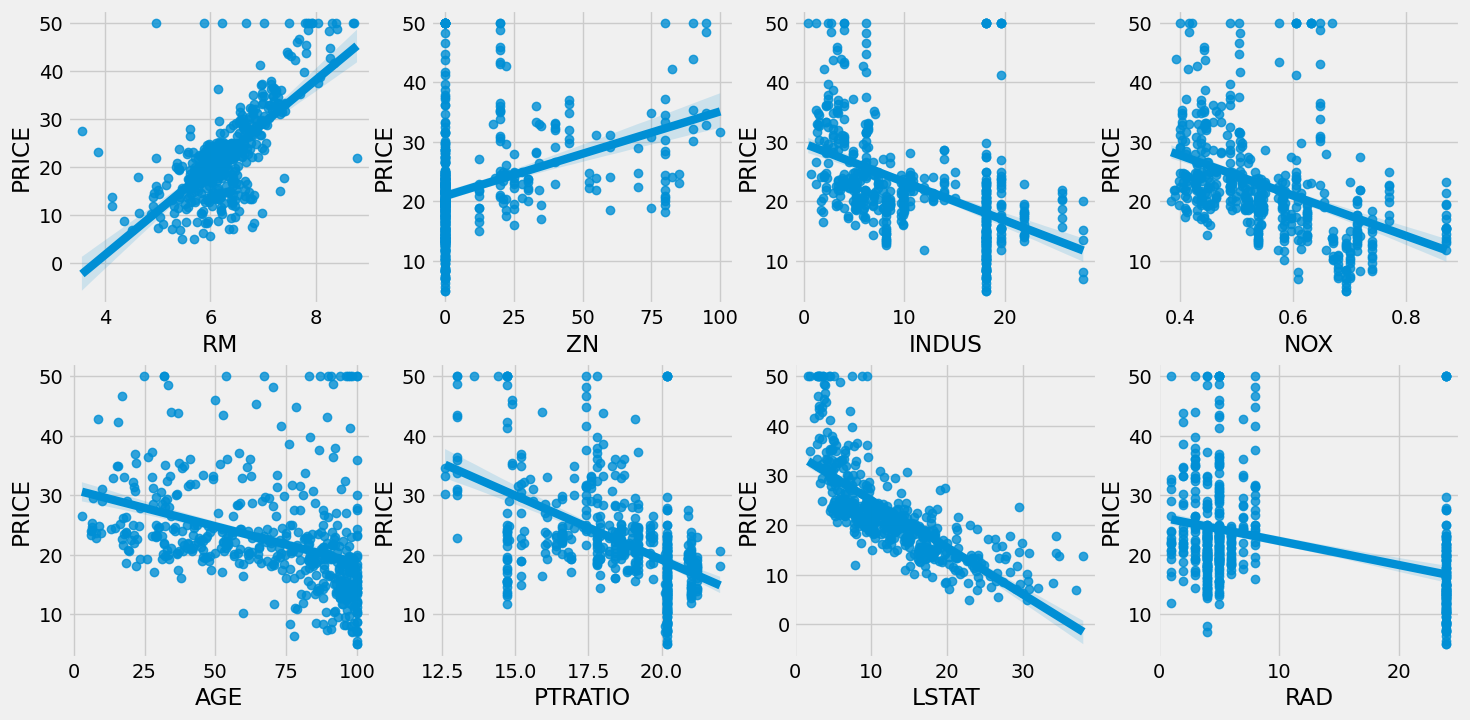

In [30]:
fig,axs = plt.subplots(figsize=(16,8), ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    #seaborn의 regplot을 이용해 산점도와 선형 회귀 직성을 함께 표현
    sns.regplot(x=feature, y='PRICE', data= bostonDF,ax = axs[row][col])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,
                                                 random_state=156)

#linear Regression OLS(ordinary Least Square(OLS) method)
#error function을 gradient method로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  
rmse = np.sqrt(mse)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [6]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

절편 값: 40.995595172164485
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [7]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼이다. 유의하기.
# 컬럼이 횡으로 누웠다고 생각하면 됨.
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### K-fold cross validation
K 겹 교차 검증(Cross validation)이란 통계학에서 모델을 "평가" 하는 한 가지 방법입니다. 소위 hold-out validation 이라 불리는 전체 데이터의 일부를 validation set 으로 사용해 모델 성능을 평가하는 것의 문제는 데이터셋의 크기가 작은 경우 테스트셋에 대한 성능 평가의 신뢰성이 떨어지게 된다는 것입니다. 만약 테스트셋을 어떻게 잡느냐에 따라 성능이 다르면, 우연의 효과로 인해 모델 평가 지표에 편향이 생기게 됩니다.



이를 해결하기 위해 K-겹 교차 검증은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다. 아래의 그림을 보면, 데이터를 5개로 쪼개 매번 테스트셋을 바꿔나가는 것을 볼 수 있습니다. 첫 번째 Iteration에서는 BCDE를 트레이닝 셋으로, A를 테스트셋으로 설정한 후, 성능을 평가합니다. 두 번째 Iteration에서는 ACDE를 트레이닝셋으로, B를 테스트셋으로하여 성능을 평가합니다. 그러면 총 5개의 성능 평가지표가 생기게 되는데, 보통 이 값들을 평균을 내어 모델의 성능을 평가하게 됩니다. (아래 데이터는 모두 사실은 트레이닝 데이터입니다. Iteration이라는 상황안에서만 테스트셋이 되는 것입니다.) 이 때, 데이터를 몇 개로 쪼갰느냐가 K-겹 교차검증의 K가 됩니다.

<figure>
    <img src='https://t1.daumcdn.net/cfile/tistory/990DD2465B72F1491E' width=500 height=300>
</figure>



출처: https://3months.tistory.com/321 [Deep Play]

- 과적합(overfitting)을 방지하는 것이 중요하다
  - 과적합이란 train에서 성능이 좋고 Test 에서 성능이 좋지 않은것
- 반대는 과소적합(underfitting) 이라고 함

In [32]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"], axis=1, inplace = False)
lr = LinearRegression()


# K-Fold Cross validation
# cross_val_score() 로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE를 구함.
# 에러가 만약 3이라면 0으로 가게끔 해야 좋음.
# 사람은 4보다 3이 작으니 3쪽으로 가야한다(왼쪽으로)는 것을 알고있고 할 수 있으나
# 컴퓨터는 4에서 3쪽으로(왼쪽으로) 못감. 항상 왼->오
# 그래서 mean_squared_error 앞에 neg_(네거티브)를 붙여 -3 에서 -2로 가도록 해야함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)


# cross_val_score(scoring = 'neg_mean_squared_errir')로 반환된 값은 모두 음수
# 회귀의 값은 작아지면 좋으나까 마이너스를 취하면 작으면 작아질수록 좋음.
print('5 folds의 개별 negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 scores: {0: .3f}'.format(avg_rmse))

5 folds의 개별 negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 scores:  5.829


## 실제 데이터 분석
### 데이터 셋: kaggle titanic(https://www.kaggle.com/c/titanic)

In [33]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# 자료 구글 드라이브에서 가져오기
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/클라우드반 수업/강의자료다운(cvs)/train.csv')
test = pd.read_csv('/content/drive/MyDrive/클라우드반 수업/강의자료다운(cvs)/test.csv')

## 탐색적 자료 분석(Exploratory Data Analysis(EDA)


 - survived : 생존=1, 죽음=0
 - pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
 - sibsp : 함께 탑승한 형제 또는 배우자 수
 - parch : 함께 탑승한 부모 또는 자녀 수
 - ticket : 티켓 번호
 - cabin : 선실 번호
 - embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
print(train.shape,test.shape)

(891, 12) (418, 11)


In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
train['Survived'] == 1  # 생존여부 : 생존 여부 찾기

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [14]:
train[train['Survived']==1]['Sex'] # 생존 여부 중 True(생존)만 찾는데 성별 옆에 달아주기

1      female
2      female
3      female
8      female
9      female
        ...  
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 342, dtype: object

In [15]:
train[train['Survived']==1]['Sex'].value_counts()  # 명 수 세기

female    233
male      109
Name: Sex, dtype: int64

In [35]:
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()   # 생존자를 카운트
  dead = train[train['Survived']==0][feature].value_counts()   # 사망자를 카운트
  df = pd.DataFrame([survived,dead])  # [생존자, 사망자]를 DataFrame
  df.index = ['Survived', 'Dead']  # index화
  df.plot(kind = 'bar', stacked = True, figsize = (10,5))  # 바 그래프 형태로 그림


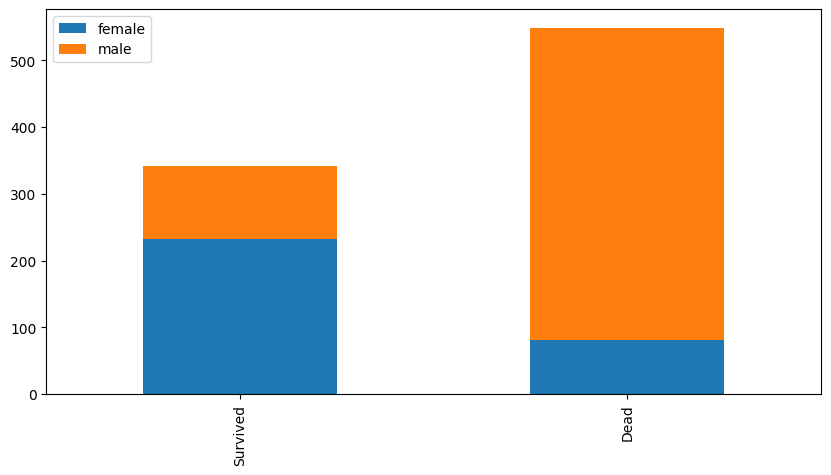

In [19]:
bar_chart('Sex')   # 무슨 이유로 남자가 사망했을까?

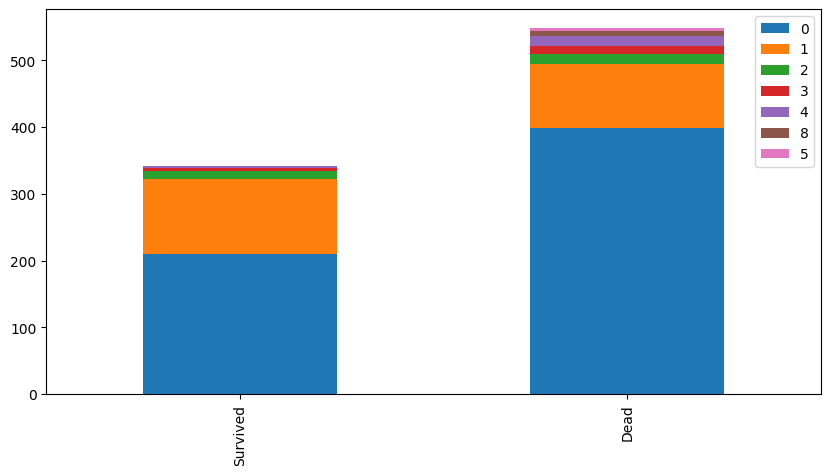

In [20]:
bar_chart('SibSp')  # 함께 탑승한 형제 또는 배우자 수에 따라 생존자가 왜 다를까

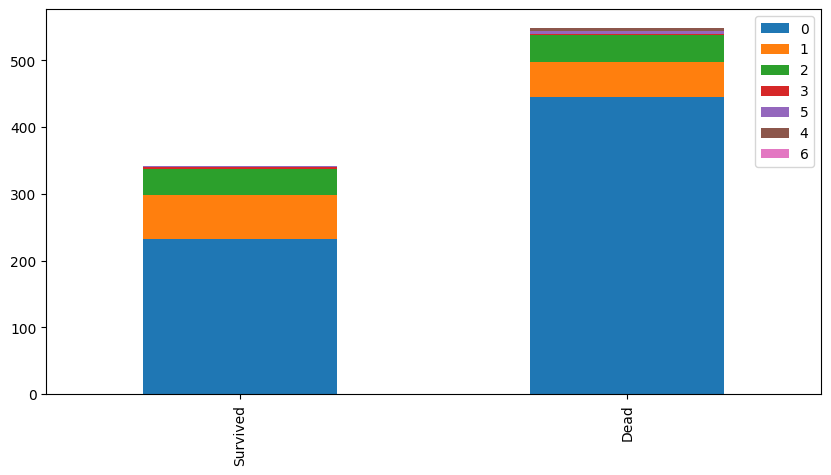

In [21]:
bar_chart('Parch')   # 함께 탑승한 부모 또는 자녀 수

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

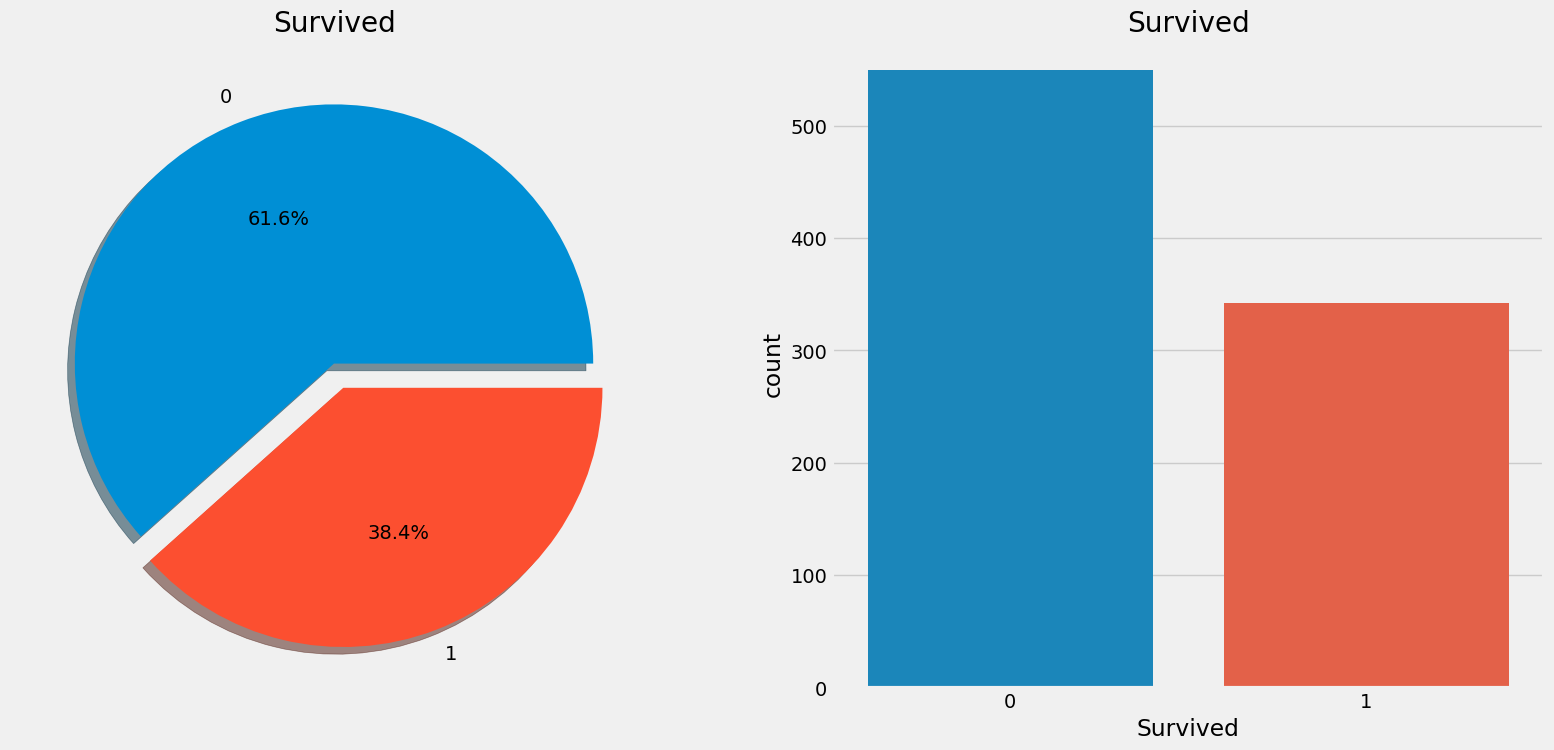

In [37]:
f,ax = plt.subplots(1,2, figsize = (18,8))
train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax=ax[0], shadow = True)
# explode : 각 항목이 파이의 원점에서 튀어나오는 정도를 나타냄
# autopct : 각 항목의 퍼센트를 표시
# shadow : 그림자를 그릴것인지 

ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = train['Survived'], ax = ax[1])
ax[1].set_title('Survived')
plt.show()

#### Pclass

In [30]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


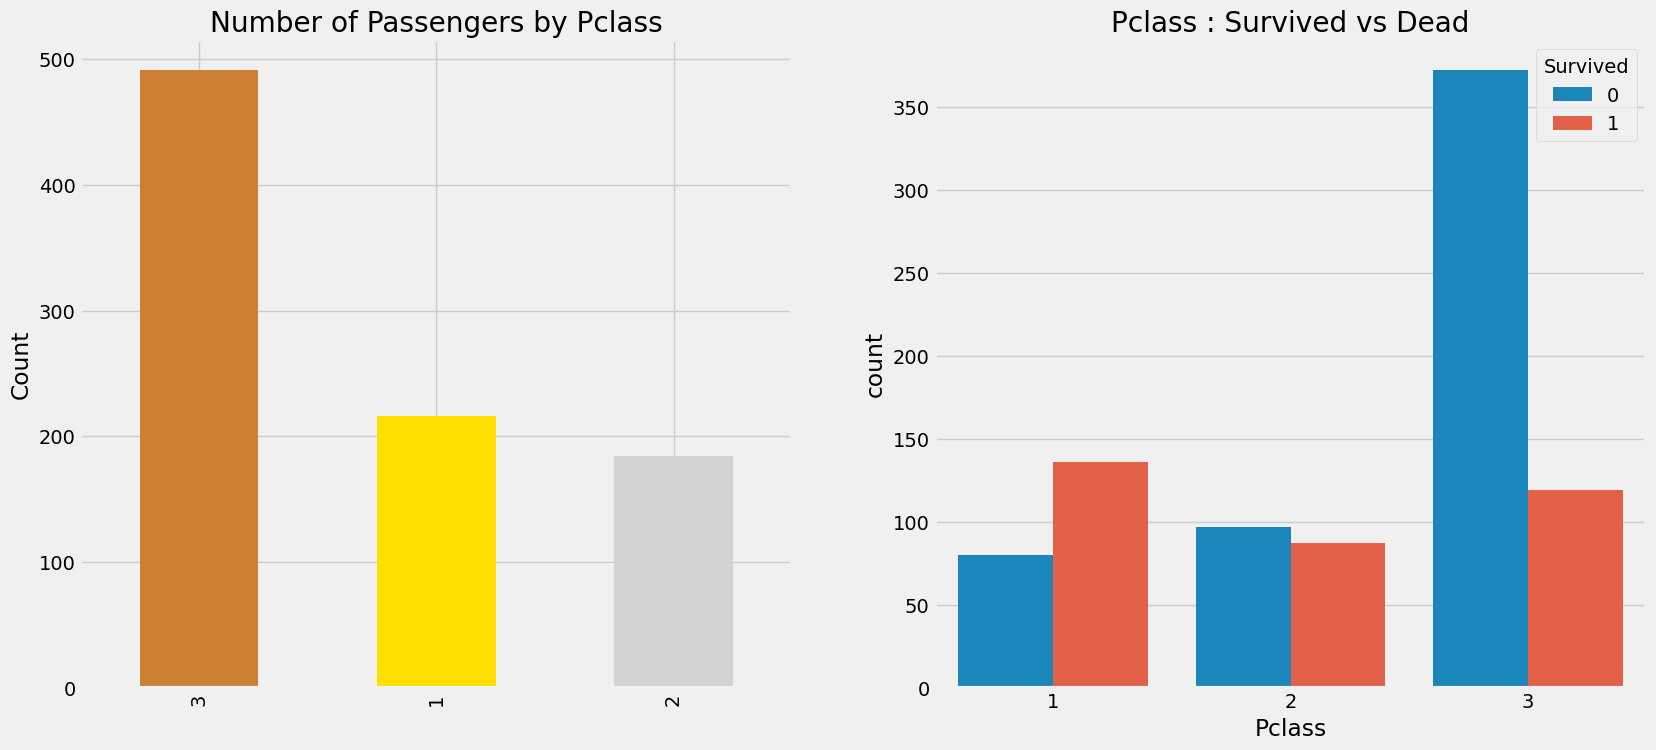

In [32]:
f,ax = plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue = 'Survived', data = train, ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

In [33]:
pd.crosstab(train.Sex, train.Survived, margins=True).style.background_gradient(cmap='summer_r')
# 0이 사망/ 1이 생존

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


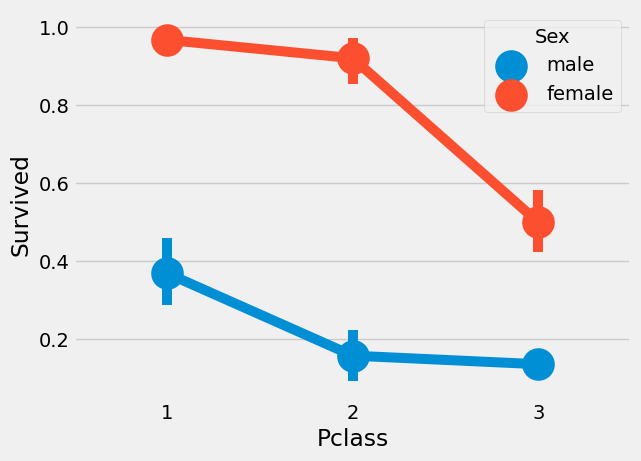

In [35]:
# 포인트 플랏 그리기
sns.pointplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train)
plt.show()

In [36]:
print('Oldest Passenger was of : ', train['Age'].max(), 'Years')
print('Youngest Passenger was of : ', train['Age'].min(), 'Years')
print('Average Age on the ship : ', train['Age'].mean(), 'Years')   # 평균
print('Median Age on the ship : ', train["Age"].median(), 'Years')  # 중위수(중앙값)
print('Mode Age on the ship : ', train['Age'].mode(), 'Years')      # 최빈값(가장 자주나오는 값)

Oldest Passenger was of :  80.0 Years
Youngest Passenger was of :  0.42 Years
Average Age on the ship :  29.69911764705882 Years
Median Age on the ship :  28.0 Years
Mode Age on the ship :  0    24.0
Name: Age, dtype: float64 Years


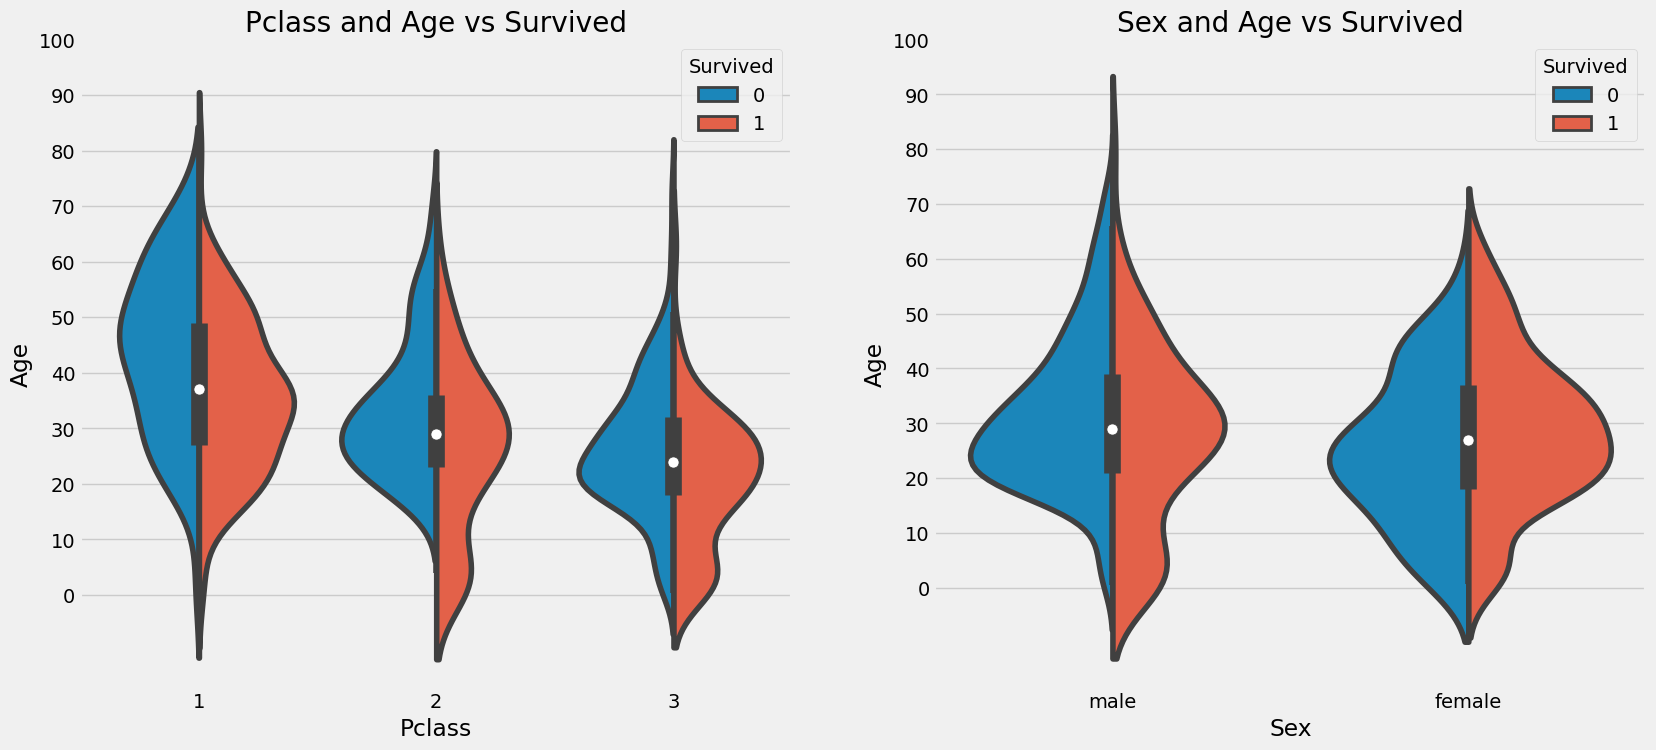

In [39]:
f,ax = plt.subplots(1,2,figsize = (18,8))
sns.violinplot( x = 'Pclass', y = 'Age', hue = 'Survived', data = train, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot( x = 'Sex', y = 'Age', hue = 'Survived', data = train, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [38]:
# train['Name'].str  # str로 바꿔줌

In [39]:
train['Name'].str.extract('([A-Za-z]+)\.', expand = False)   # 여기서 추출

# ([A-Za-z]+)\. : 정규표현식(regular expression))
# -> 규칙 : 대문자나 소문자로 시작하다가 . 으로 끝나면 추출해주세요

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [55]:
train_test_data = [train,test]
# Name에 따라서 뭐가 다른가? -> 전에 각각 해당하는 value를 count함

for dataset in train_test_data:
  dataset['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand = False)
# extract('([A-Za-z]+)\.  : 정규표현식
# A-Z와 a-z를 찾아서 어느 지점에서 끝내는가? : . 을 기준으로 해서 자르라는 이야기. 그 다음에 count함 

In [56]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

- expand 설명


In [57]:
import numpy as np
import pandas as pd

s2 = pd.Series(['a_b_c','c_d_e', np.nan, 'f_g_h'], dtype = 'string')
s2

0    a_b_c
1    c_d_e
2     <NA>
3    f_g_h
dtype: string

In [58]:
s2.str.split('_')

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

- 방금 저장된 리스트 중에서 몇번ㅉ를 추출할 것인지를 정하려면, get 또는 []를 사용해서 지정할 수 있다. get()이나 []이나 결과는 같음.

In [59]:
s2.str.split('_').get(1)

# 또는

s2.str.split('_')[1]

# 같음.

['c', 'd', 'e']

In [60]:
s2.str.split('_',expand=True) # 데이터프레임 형식으로 확장되었음.

,0,1,2
0,a,b,c
1,c,d,e
2,<NA>,<NA>,<NA>
3,f,g,h


In [61]:
s2.str.split('_',expand=False) # 데이터프레임 형식으로 확장되었음.

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

- 원본 Series에 StringDtype이 있으면 출력 열도 모두 StringDtype이 됨.
- n에 원하는 갯수를 입력하여 분할하고자 하는 수를 제한할 수도 있다.

In [62]:
s2.str.split('_',expand=True,n=1) # 데이터프레임 형식으로 확장되었음.

,0,1
0,a,b_c
1,c,d_e
2,<NA>,<NA>
3,f,g_h


In [63]:
s2.str.split('_',expand=True,n=2) # 데이터프레임 형식으로 확장되었음.

,0,1,2
0,a,b,c
1,c,d,e
2,<NA>,<NA>,<NA>
3,f,g,h


### one-hot encoding

In [64]:
# 극단적으로 나누어 보자
title_mapping = {'Mr':0, "Miss":1, 'Mrs':2,'Master':3,
                 'Dr':3,'Rev':3,'Col':3,'Major':3,'Mlle':3,'Ms':3,'Sir':3,'Don':3,'Countess':3,
                 'Capt':3,'Lady':3,'Jonkheer':3,'Mme':3}

for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping)  # 모든 피쳐에 적용해달라

In [65]:
dataset['Title']

0      0
1      2
2      1
3      2
4      0
      ..
413    0
414    0
415    2
416    2
417    1
Name: Title, Length: 418, dtype: int64

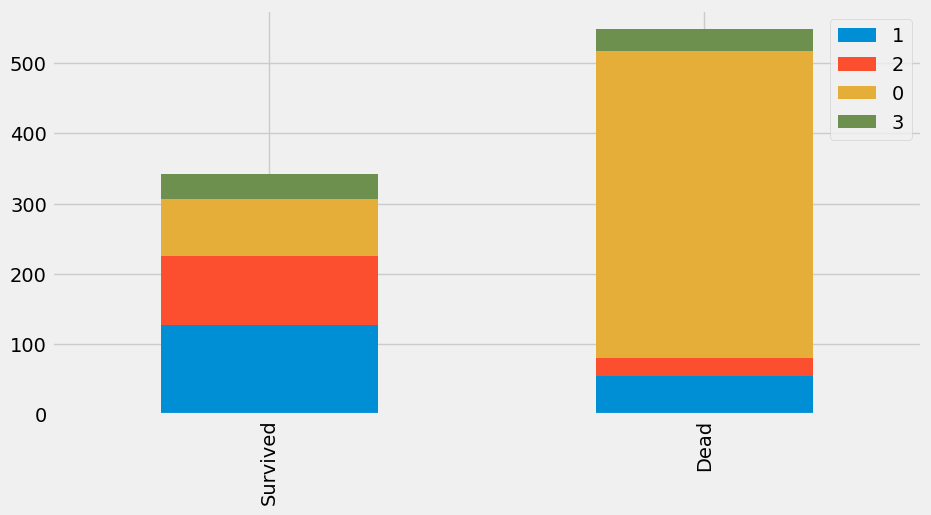

In [66]:
bar_chart('Title')

In [67]:
sex_mapping = {'male':0, 'female':1}
for dateset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)
# method : sklearn.preprocessing import OneHotencoder/ pandas의 get_dummies

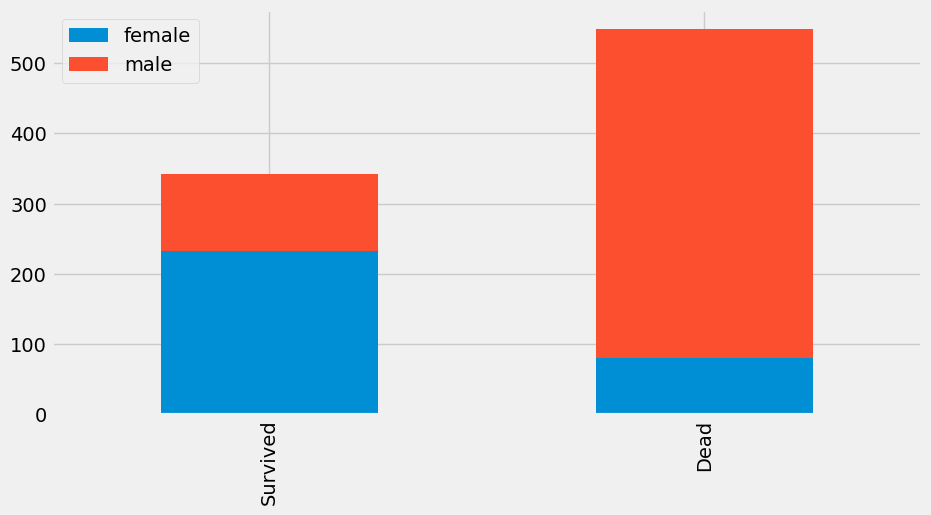

In [68]:
bar_chart('Sex')

In [69]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
0,0,517
1,182,0
2,125,0
3,7,60


- 결측치 처리하기

In [70]:
#missing Age를 각 Title에 대한 연령의 중간값으로 채움(Mr,Mrs,Miss,others) inplace 는 채울꺼냐?
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)

#train에 결측치 처리를 하였다면, test에도 똑같이 처리를 해야됨.
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

In [71]:
train['Age'].isna().sum()  # 결측치 처리하고 꼭 다시 확인해보기

0

In [72]:
train[['Title','Age']].groupby(['Title'], as_index = False).mean()

,Title,Age
0,0,31.823017
1,1,21.620879
2,2,35.776000
3,3,19.577164


#### FacetGrid

- 가설 세우기
  - 가설2) 사망자의 나이가 어떻게 될까? + 생존자

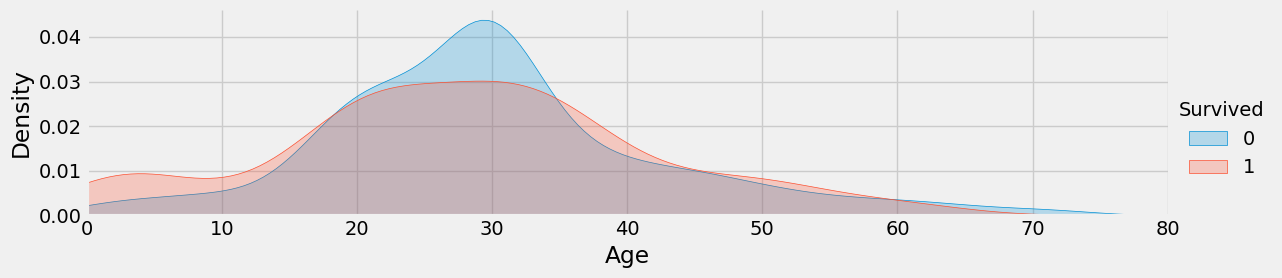

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

#변수의 분포를 시각화하거나, 여러 변수들 사이의 상관관계를 여러개의 그래프로 쪼개서 표현할때 유용함
# FeactGrid는 Colum,row, hue를 통한 의미구분을 통해 총 3차원까지 구현이 가능함.
#aspect : subplot의 세로 대비 가로의 비율.
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()
#20-30대 : 사망률 > 생존률 -->> 왜 그럴까?

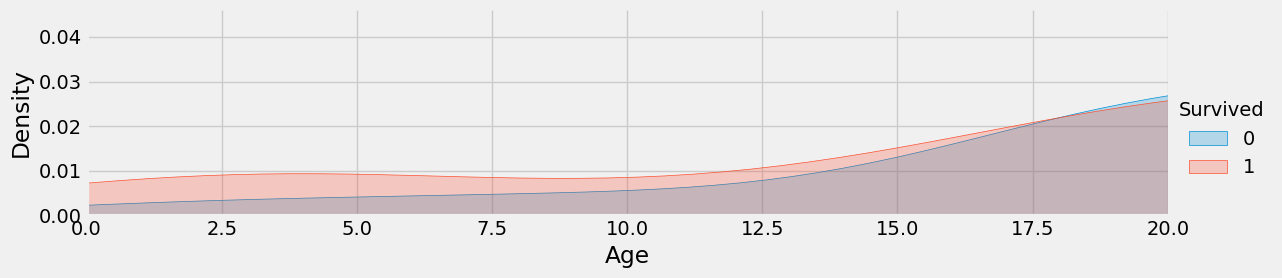

In [74]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.xlim(0,20)

plt.show()
#0-20까지 나이로 자름.

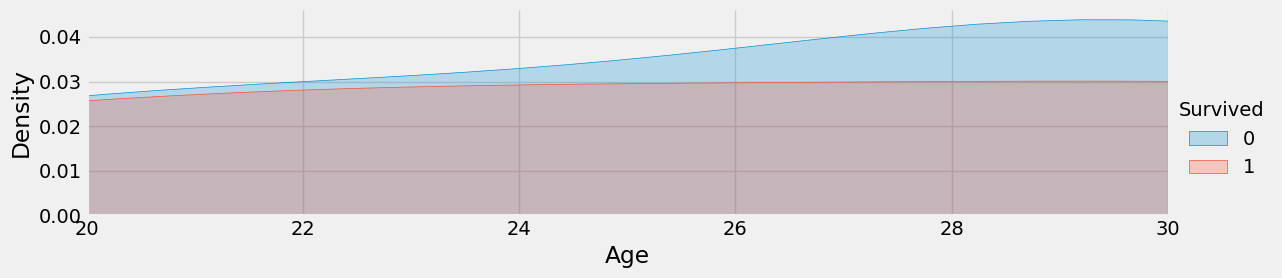

In [75]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.xlim(20,30)

plt.show()
#20-30까지 나이로 자름.

0~80세까지 들어있음. 너무 많다. Pandas ->Binning 기술을 씀 (연속형 변수를 특정한 구간으로 잘라서 범주형으로 만들어주는 기술)
 - 판다스의 q-cut


잇달아 일어나는 형태의 데이터는 많은 정보를 주지 못하므로 이럴땐 각각 하나의 카테고리에 나이를 담아 정보를 보다 명확하게 확인할 수 있는 방법

In [76]:
for dataset in train_test_data:
  dataset.loc[dataset['Age'] <=16, 'Age'] = 0,
  dataset.loc[((dataset['Age'] > 16) and (dataset['Age'] <= 26)), 'Age'] = 1

ValueError: ignored

- 콤마(,)로 연결을 함 ->  0이면서 1인 조건을 만족하는 것이 없음. 그래서 multi index로 받아들여서 동시에 처리가 안되는거

In [77]:
for dataset in train_test_data: 
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1 
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2 
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3 
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
  dataset['Age'] = dataset['Age'].map( { 0: 'Child', 1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

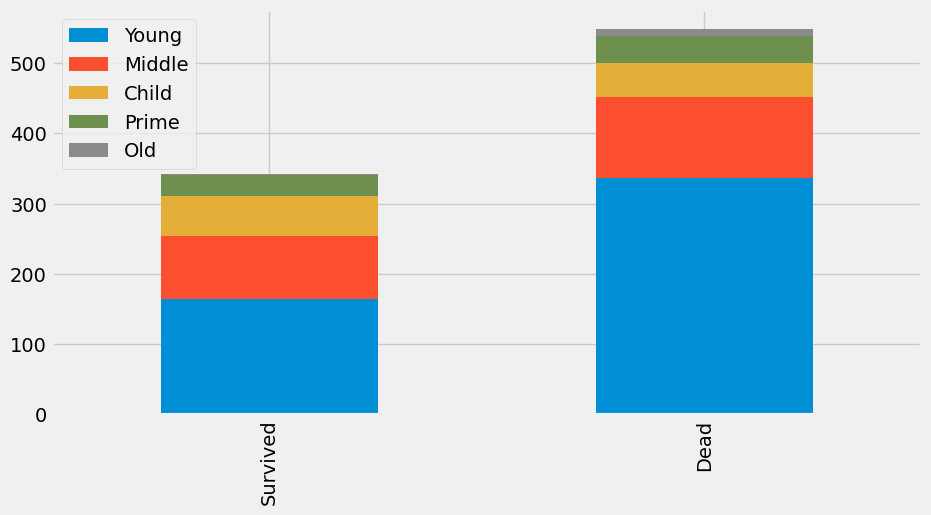

In [78]:
bar_chart('Age')

#### FamilySize
 - 함께 동승한 부모님과 아이들의 수와/ 형제와 배우자의 수
 - 혼자 탄 경우와 가족들과 탄 경우가 어떻게 다를까?
 - SibSp + Parch

In [82]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# 솔로일 가능성이 있기 때문에 1을 더해줌. 
# 왜냐면 파이썬은 0부터 숫자를 세기 때문에 1을 더해주지 않으면 0이 나오는데 
# 솔로로 탔다면 1명으로 세야 하기 때문에.


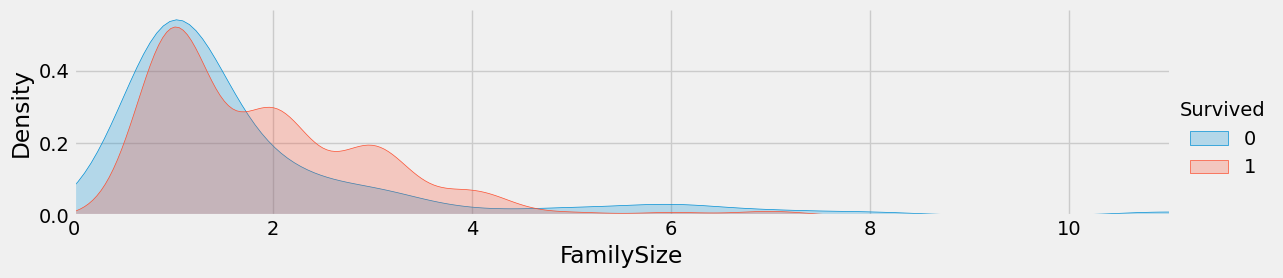

In [83]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', shade = True)     # kde : 이차원 밀집도 그래프
facet.set(xlim = (0, train['FamilySize'].max()))
facet.add_legend()

plt.show()

- 혼자일 경우는 사망률, 생존률이 높음.

#### 실제 모델링 적용

In [84]:
X_train = train.drop(['Survived', 'PassengerId'], axis = 1) # 필요없는 부분 드롭하기
y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()

## y_test는 없는 이유
## y_test를 맞히는게 목표. 처음부터 없었어,,,(이해안가지만 그렇다고 치자?)

In [ ]:
X_train    # drop 된거 확인해보기

In [87]:
X_test.isna().sum()   #결측치 확인

Pclass          0
Name            0
Sex           418
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin         327
Embarked        0
Title           0
FamilySize      0
dtype: int64

In [ ]:
X_test['Fare'].fillna(0, inplace = True)  # 결측치 있는 곳 채워넣기

In [ ]:
# 원핫인코딩은 힘들어서 일단 포기

# 트레인 버렸다면 테스트에서도 버려야 한다.
## 트레인과 테스트 드랍했다면 다시 실행하지 말자 -->> 오류난다

In [88]:
X_train.drop('Name', axis = 1, inplace = True)
X_test.drop('Name', axis = 1, inplace = True)

In [89]:
X_train.drop('Ticket', axis = 1, inplace = True)
X_test.drop('Ticket', axis = 1, inplace = True)

In [90]:
X_train.drop('Cabin', axis = 1, inplace = True)
X_test.drop('Cabin', axis = 1, inplace = True)

In [91]:
X_train.drop('Age', axis = 1, inplace = True)
X_test.drop('Age', axis = 1, inplace = True)

In [92]:
X_train.drop('Title', axis = 1, inplace = True)
X_test.drop('Title', axis = 1, inplace = True)

In [93]:
X_train.drop('Embarked', axis = 1, inplace = True)
X_test.drop('Embarked', axis = 1, inplace = True)

In [97]:
X_train.drop('Sex', axis = 1, inplace = True)

In [98]:
## 알고리즘 적용하기

from sklearn.linear_model import LinearRegression

# 데이터가 정렬되어 있을 경우도 있기 때문에 데이터를 shuffle 해줌.
from sklearn.utils import shuffle

lig_reg = LinearRegression()
lig_reg.fit(X_train, y_train)

lig_reg.score(X_train, y_train)

0.1298016696530827

In [101]:
X_test.drop('Sex', axis = 1, inplace = True)

In [106]:
X_test.fillna(0,inplace=True)

In [107]:
y_pred = lig_reg.predict(X_test)

df1 = pd.DataFrame(y_pred)
df1

,0
0,0.240864
1,0.211323
2,0.408340
3,0.241605
4,0.272972
...,...
413,0.241060
414,0.662341
415,0.240349
416,0.241060


#### 당뇨병 예측하기


In [110]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

- age : 나이
- sex : 성별
- bmi : 체질량지수
- bp : 평균 혈압
- s1 : 혈중 총콜레스테롤
- s2 : 저밀도 지질단백질
- s3 : 고밀도 지질단백질
- s4 : 총 콜레스테롤 수치
- s5 : 혈중 트리글리세라이드 수치
- s6 : 혈당 수치

-------------------------------------------(내가 만든 부분)-------------------------------------------

In [ ]:
diabetes = load_diabetes()

diabetesDF = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetesDF

In [ ]:
diabetesDF.isnull().sum()

In [ ]:
diabetesDF.describe()

In [ ]:
diabetesDF.info()

-------------------------------------------------------------------------------------------(여기까지가 끝인가봅니다)

In [116]:
# 1. 데이터 로드하기
diabetes = load_diabetes()

In [117]:
# 2. 데이터 쉐입(shape) 확인하기
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [118]:
print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [120]:
print(type(diabetes))

<class 'sklearn.utils.Bunch'>


In [ ]:
# 데이터 description 설명들 확인
print(diabetes.DESCR)

- input data 보기

In [122]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

- output data 보기

In [123]:
diabetes.target[0:3]

array([151.,  75., 141.])

In [124]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

- 당뇨병 환자 데이터 시각화

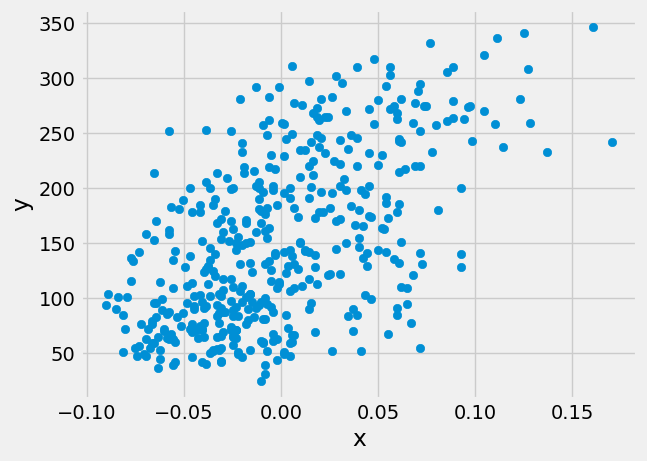

In [126]:
# 당뇨병 환자 데이터 시각화하기

plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [127]:
df = pd.DataFrame(diabetes.data, columns = diabetes['feature_names'])
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
# 상관관계 확인 (코릴레이션)

df_corr = df.corr()
df_corr

In [129]:
cor_order = df_corr.loc[:'s6', 'target'].abs().sort_values(ascending = False)
cor_order

bmi    0.586450
s5     0.565883
bp     0.441484
s4     0.430453
s3     0.394789
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: target, dtype: float64

- 상관계수(-1~1까지, 0이면 관계가 없음) 가 0.5를 넘은 bmi와 s5를 대상으로 산점도와 회귀선을 그려보자

In [145]:
names = ['target', 'bmi', 's5']
diabetes_df = df.loc[:, names]

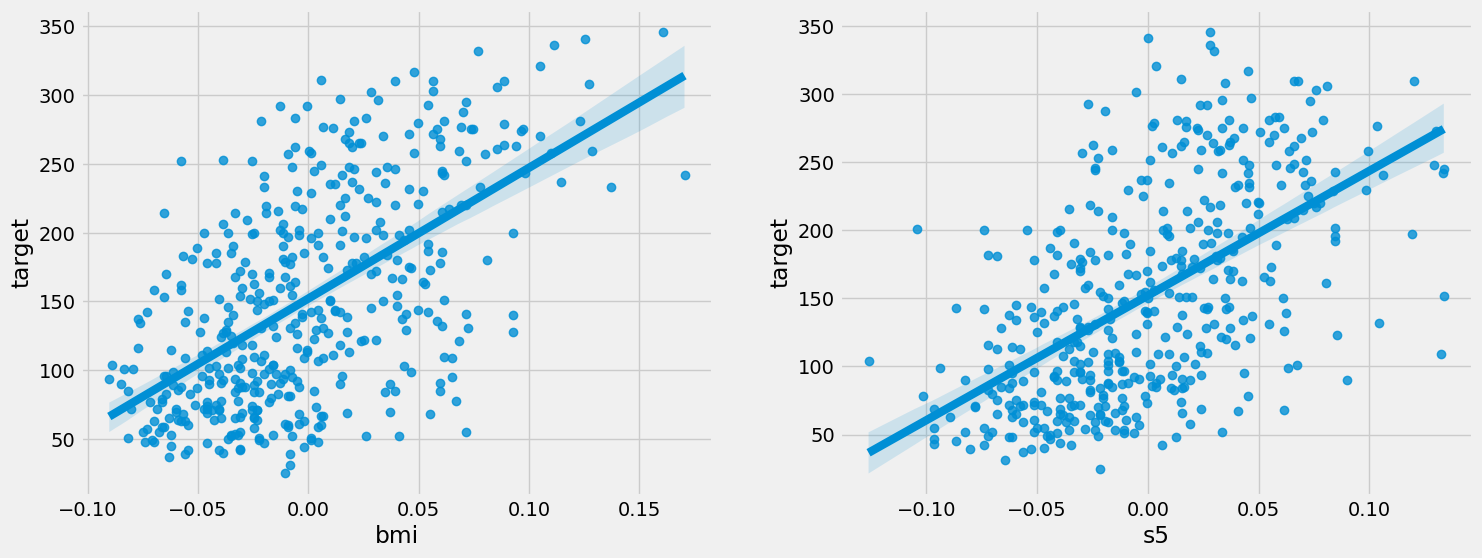

In [149]:
plt.figure(figsize = (16,6))
for i, name in enumerate(names[1:]):
  ax = plt.subplot(1,2,i+1)
  sns.regplot(x=name, y=names[0], data = diabetes_df, ax = ax)
plt.show()

In [147]:
# train 데이터와 test 데이터를 split

from sklearn.model_selection import train_test_split

x_data=diabetes_df.loc[:, ['bmi', 's5']]
y_data=diabetes_df.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1)

In [135]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 2) (353,)
(89, 2) (89,)


In [136]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train,y_train)

0.4741054934306861

In [137]:
print(np.round(lr.coef_, 2))
print(np.round(lr.intercept_, 2))

[696.73 604.62]
151.73


In [138]:
pred = lr.predict(X_test)

- bmi prediction

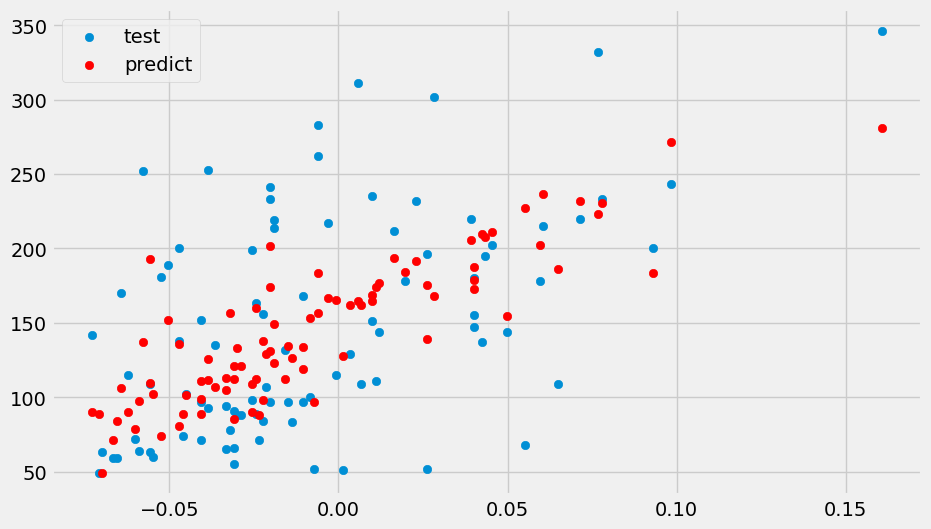

In [139]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['bmi'], y_test, label='test')  
plt.scatter(X_test['bmi'], pred, c='r', label='predict')  
plt.legend() 
plt.show()

- s5 prediction

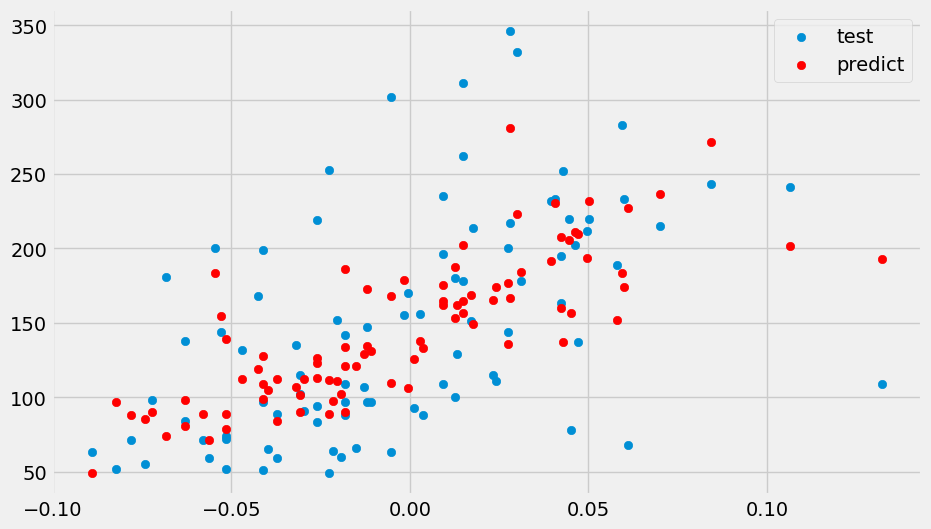

In [140]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['s5'], y_test, label='test')  
plt.scatter(X_test['s5'], pred, c='r', label='predict')  
plt.legend() 
plt.show()

In [141]:
from sklearn.metrics import mean_squared_error

test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred) 
test_mse = mean_squared_error(y_test, test_pred)

In [142]:
print("train data set RMSE :", round(train_mse**0.5, 3))
print("test data set RMSE :", round(test_mse**0.5, 3))

train data set RMSE : 56.517
test data set RMSE : 57.045


## 회귀분석 실습 2
### 공공 자전거 수요 예측(Bike Sharing Demand)

###https://www.kaggle.com/c/bike-sharing-demand/overview

 - 데이터 소개
  - 날짜 및 시간, 기온, 습도, 풍속 등의 정보를 정보를 
  
  기반으로 1시간 간격으로 자전거 대여 횟수를 기록한 데이터.
  - 기록 날짜는 2011년 1월 ~ 2012년 12월까지
  - 데이터에 자세한 정보는 소개된 캐글 사이트에서 확인 가능.


### Data Fields
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +  Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

In [161]:
import calendar
import numpy as np
import pandas as pd
# from pandas.core.frame import DataFrame
# from pandas.core.series import series   # 이렇게 불러도 됨.
import seaborn as sns       # 통계적 plot
from scipy import stats     # 통계
import missingno as msno    # 결측치 보는 plot
from datetime import datetime      #  day
import matplotlib.pyplot as plt
import warnings             #  에러는 아닌데 주희하는게 뜨는것을 방지.
warnings.filterwarnings('ignore')


df_train = pd.read_csv('/content/b-train.csv')
df_test = pd.read_csv('/content/b-train.csv')

In [151]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [152]:
df_test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [153]:
print(df_train.shape, df_test.shape)

(10886, 12) (10886, 12)


In [155]:
df_train.describe

<bound method NDFrame.describe of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0

In [156]:
df_train.info()  # datetime ; object (시간이어서 오브젝트로 나옴)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [157]:
df_train['datetime'] # 0번째 : 2011-01-01 00:00:00

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [166]:
# datetime 쪼개기
df_train['date'] = df_train.datetime.apply(lambda x : x.split()[0])
# split은 스페이스(공백)을 중심으로 나눔. 고로 '2011-01-01 00:00:00' 를 '2011-01-01'와 '00:00:00'로 나눔.
df_train['hour'] = df_train.datetime.apply(lambda x : x.split()[1].split(':')[0])
# '00:00:00' 에서 : 를 기준으로 h,m,s를 나눔.

df_train["weekday"] = df_train.date.apply(lambda dateString : calendar.month_name[
    datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df_train["month"] = df_train.date.apply(lambda dateString : calendar.month_name[
    datetime.strptime(dateString,"%Y-%m-%d").month])
df_train["season"] = df_train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
df_train["weather"] = df_train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [167]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      0 non-null      object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     0 non-null      object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  hour        10886 non-null  object 
 14  month       10886 non-null  object 
 15  weekday     10886 non-null  object 
dtypes: float64(3), int64(6), object(7)
memory usage: 1.3+ MB


In [168]:
# 아직도 object라서 처리하기 힘듬. 카테고리화 해줌.
categoryVariablesList = ['hour','weekday','month','season','weather','holiday','workingday']
for var in categoryVariablesList:
    df_train[var] = df_train[var].astype('category')

In [169]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      0 non-null      category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     0 non-null      category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  date        10886 non-null  object  
 13  hour        10886 non-null  category
 14  month       10886 non-null  category
 15  weekday     10886 non-null  category
dtypes: category(7), float64(3), int64(4), object(2)
memory usage: 841.9+ KB


- 결측치 확인

In [ ]:
df_train.isna().sum()
# df_train_isnull.sum()

In [ ]:
# 결측치 보는 plot
import missingno as msno
msno.matrix(df_train,figsize = (12,5))
# 결측치가 있다면 하얀색 줄이 그어짐.

In [ ]:
df_train_1 = df_train.copy()  # 원본 훼손 방지
df_test_1 = df_test.cipy()

df_train['datetime'] = pd.to_datetime(df_train_1['datetime'])

In [ ]:
type(df_train_1)

In [ ]:
# dataFrame 가능한 것

df_train_1['year'] = df_train_1['datetime'].dt.year
df_train_1['month'] = df_train_1['datetime'].dt.month
df_train_1['day'] = df_train_1['datetime'].dt.day
df_train_1['hour'] = df_train_1['datetime'].dt.hour
df_train_1['minute'] = df_train_1['datetime'].dt.minute
df_train_1['second'] = df_train_1['datetime'].dt.second

#요일 데이터 : 일요일은 0
df_train_1['dayofweek'] = df_train_1['datetime'].dt.dayofweek